In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os

if os.path.isdir("/content/drive/My Drive/ServeNet/Result"):
  os.chdir("/content/drive/My Drive/ServeNet/Result")
else: 
  !git clone https://github.com/yylonly/ServeNet.git
  os.chdir("/content/drive/My Drive/ServeNet/Result")

In [3]:
import pandas
import numpy as np
import os
import matplotlib.pyplot as plt
import json

%matplotlib inline 

In [4]:
basic_path = '.'

top_flag = 'top5'

top5_json_files = []
method_names = []
if os.path.exists(basic_path):
    files = os.listdir(basic_path)
    for f in files:
        if top_flag in f and '.json' in f:
            sub_f = f.split('_')
            method_names.append(sub_f[1])
            top5_json_files.append(f)

top5_json_files

['top5_RF_acc_category.json',
 'top5_LDA-Linear-SVM_acc_category.json',
 'top5_AdaBoost_acc_category.json',
 'top5_LDA-RBF-SVM_acc_category.json',
 'top5_C-LSTM_acc_category.json',
 'top5_LSTM_acc_category.json',
 'top5_CNN_acc_category.json',
 'top5_BI-LSTM_acc_category.json',
 'top5_NaiveBayes_acc_category.json',
 'top5_Recurrent-CNN_acc_category.json',
 'top5_ServeNet(Original)_acc_category.json',
 'top5_ServeNet_acc_category.json.json']

In [5]:
print(len(top5_json_files) == len(method_names))

True


In [6]:
len(method_names)
method_names

['RF',
 'LDA-Linear-SVM',
 'AdaBoost',
 'LDA-RBF-SVM',
 'C-LSTM',
 'LSTM',
 'CNN',
 'BI-LSTM',
 'NaiveBayes',
 'Recurrent-CNN',
 'ServeNet(Original)',
 'ServeNet']

In [7]:
categories = ["Tools","Financial","Messaging","eCommerce","Payments","Social","Enterprise","Mapping","Telephony","Science",
          "Government","Email","Security","Reference","Video","Travel","Sports","Search","Advertising","Transportation",
          "Education","Games","Music","Photos","Cloud","Bitcoin","Project Management","Data","Backend","Database",
          "Shipping","Weather","Application Development","Analytics","Internet of Things","Medical","Real Estate",
          "Events","Banking","Stocks","Entertainment","Storage","Marketing","File Sharing","News Services","Domains",
          "Chat","Media","Images","Other"]

ordered_method_names = ["CNN", "AdaBoost", "LDA-Linear-SVM", "LDA-RBF-SVM", "NaiveBayes", "LSTM", "RF", "Recurrent-CNN",
                        "C-LSTM", "BI-LSTM", "ServeNet(Original)", "ServeNet"]

columns = ["Method", "Tools","Financial","Messaging","eCommerce","Payments","Social","Enterprise",
                               "Mapping","Telephony","Science",
          "Government","Email","Security","Reference","Video","Travel","Sports","Search","Advertising","Transportation",
          "Education","Games","Music","Photos","Cloud","Bitcoin","Project Management","Data","Backend","Database",
          "Shipping","Weather","Application Development","Analytics","Internet of Things","Medical","Real Estate",
          "Events","Banking","Stocks","Entertainment","Storage","Marketing","File Sharing","News Services","Domains",
          "Chat","Media","Images","Other"]

df = pandas.DataFrame(columns=columns)

for i in range(len(ordered_method_names)):
    method = ordered_method_names[i]
    file_index = method_names.index(method)
    file_name = top5_json_files[file_index]
    print('file name:', file_name)

    ab_path = os.path.join(basic_path, file_name)

    with open(ab_path, 'r') as f:
        array = json.load(f)
        data = [method]
        for cate in categories:
            value = array[cate]
            data.append(value)
        df.loc[i] = data

    print("finish add rows")

file name: top5_CNN_acc_category.json
finish add rows
file name: top5_AdaBoost_acc_category.json
finish add rows
file name: top5_LDA-Linear-SVM_acc_category.json
finish add rows
file name: top5_LDA-RBF-SVM_acc_category.json
finish add rows
file name: top5_NaiveBayes_acc_category.json
finish add rows
file name: top5_LSTM_acc_category.json
finish add rows
file name: top5_RF_acc_category.json
finish add rows
file name: top5_Recurrent-CNN_acc_category.json
finish add rows
file name: top5_C-LSTM_acc_category.json
finish add rows
file name: top5_BI-LSTM_acc_category.json
finish add rows
file name: top5_ServeNet(Original)_acc_category.json
finish add rows
file name: top5_ServeNet_acc_category.json.json
finish add rows


In [8]:
df.iloc[10, :]

Method                     ServeNet(Original)
Tools                                0.890411
Financial                            0.976923
Messaging                            0.948454
eCommerce                                   1
Payments                             0.964706
Social                                    0.9
Enterprise                           0.873418
Mapping                              0.970149
Telephony                            0.929825
Science                              0.981818
Government                           0.890909
Email                                0.916667
Security                              0.87234
Reference                            0.829787
Video                                0.978723
Travel                               0.888889
Sports                               0.953488
Search                               0.837209
Advertising                          0.761905
Transportation                       0.928571
Education                         

In [9]:
#df.to_csv('df.csv', index=False)

# draw radar figure
labels = categories
kinds = list(df.iloc[:, 0])
print(labels)
print(kinds)

['Tools', 'Financial', 'Messaging', 'eCommerce', 'Payments', 'Social', 'Enterprise', 'Mapping', 'Telephony', 'Science', 'Government', 'Email', 'Security', 'Reference', 'Video', 'Travel', 'Sports', 'Search', 'Advertising', 'Transportation', 'Education', 'Games', 'Music', 'Photos', 'Cloud', 'Bitcoin', 'Project Management', 'Data', 'Backend', 'Database', 'Shipping', 'Weather', 'Application Development', 'Analytics', 'Internet of Things', 'Medical', 'Real Estate', 'Events', 'Banking', 'Stocks', 'Entertainment', 'Storage', 'Marketing', 'File Sharing', 'News Services', 'Domains', 'Chat', 'Media', 'Images', 'Other']
['CNN', 'AdaBoost', 'LDA-Linear-SVM', 'LDA-RBF-SVM', 'NaiveBayes', 'LSTM', 'RF', 'Recurrent-CNN', 'C-LSTM', 'BI-LSTM', 'ServeNet(Original)', 'ServeNet']


In [10]:
df = pandas.concat([df, df[[labels[0]]]], axis=1)
centers = np.array(df.iloc[:, 1:])

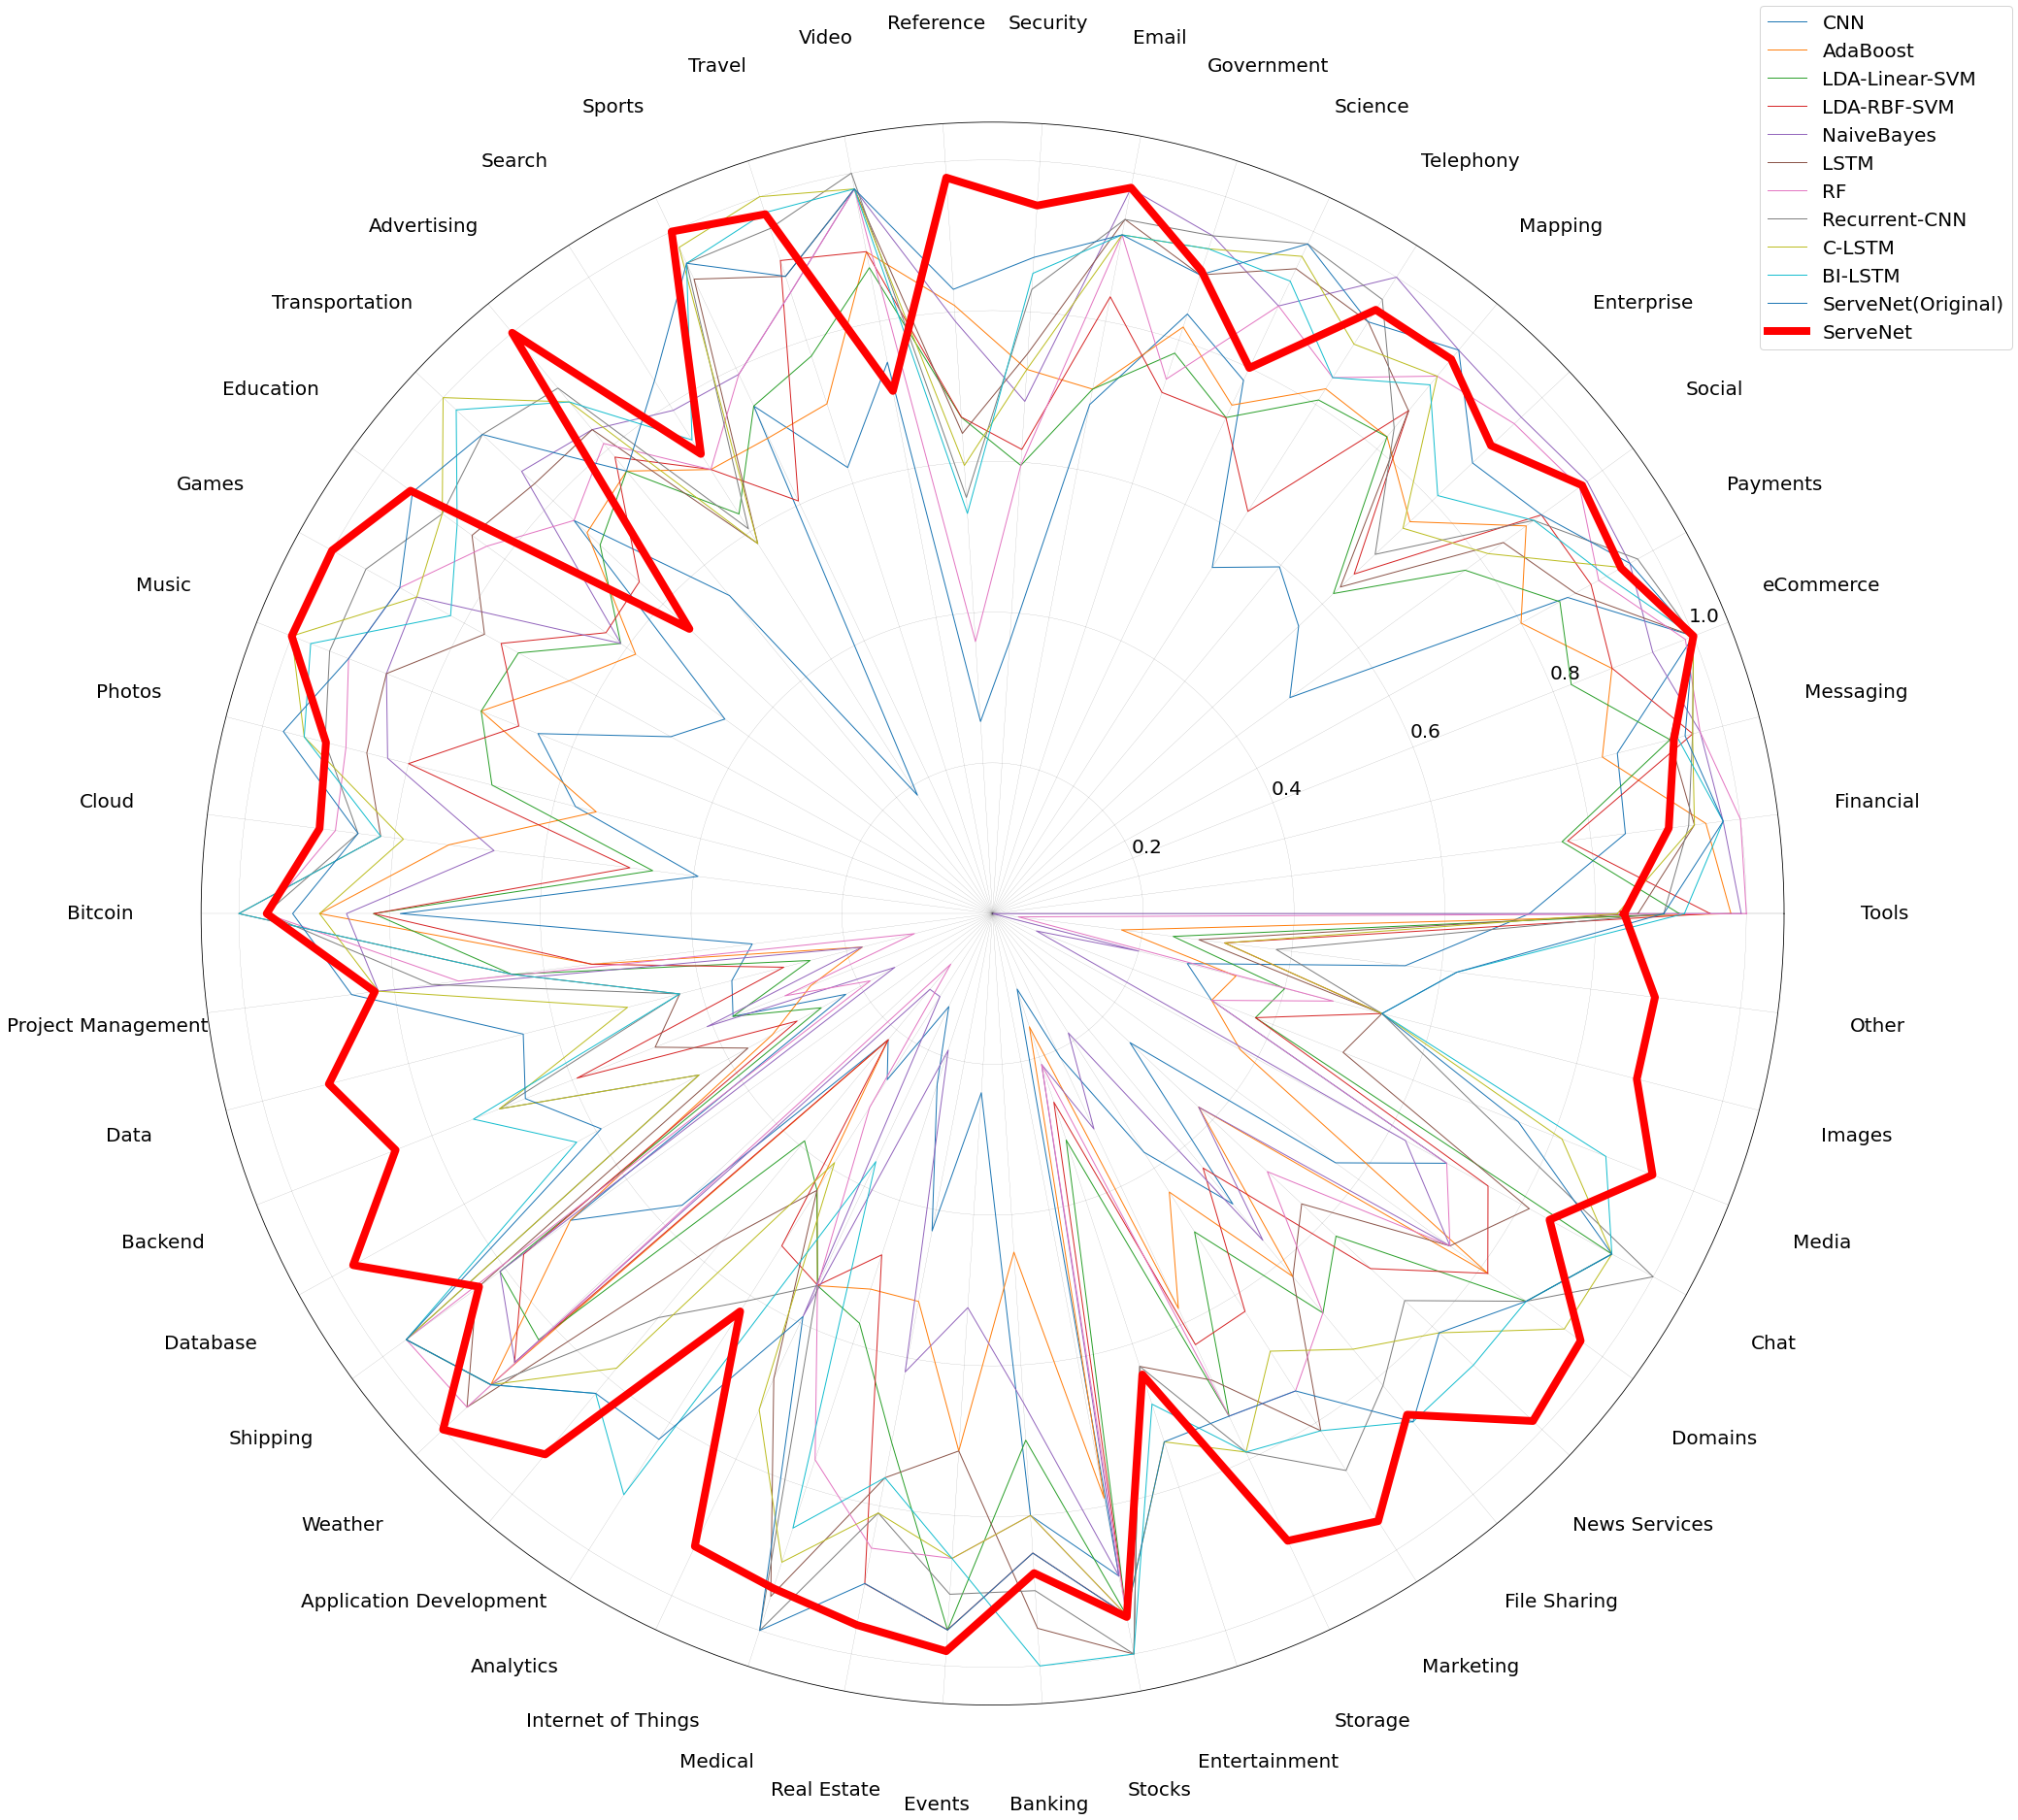

<Figure size 432x288 with 0 Axes>

In [12]:
n = len(labels)
angle = np.linspace(0, 2 * np.pi, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))

fig = plt.figure(figsize=(30, 30))

ax = fig.add_subplot(111, polar=True)    # 参数polar, 以极坐标的形式绘制图形

# 画线
for i in range(len(kinds)):

    if i == len(kinds) - 1:
        ax.plot(angle, centers[i], linewidth=8, color='red', label=kinds[i])
    else:
        ax.plot(angle, centers[i], linewidth=1, label=kinds[i])
        
# 添加属性标签
ax.set_thetagrids(angle * 180 / np.pi, labels)
ax.tick_params(direction='out', length=93, width=0.1, grid_color='k', grid_linewidth=0.2, grid_alpha=0.4, labelsize=20)
# plt.title('Categories')
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 0.85), prop={'size': 20})
# fig1 = plt.gcf()
# plt.savefig('RadarTop5.pdf', format='pdf', dpi=300)
plt.show() 
plt.draw()
fig.savefig('Radar%s.pdf' % top_flag, format='pdf', dpi=300)

In [19]:
 os.chdir("/content/drive/My Drive/ServeNet")
 !ls -l

total 3729
-rw------- 1 root root    1272 Aug  5 19:49 'Copy of ServeNet-BERT-ServiceName-DataGenerator-More-ServeNetHistory'
drwx------ 2 root root    4096 Jun  3 16:12  Data
drwx------ 2 root root    4096 Aug  5 03:37  Model
drwx------ 2 root root    4096 Aug  5 22:15  Result
-rw------- 1 root root 3707865 Apr 22 18:30  saved_model.pb
-rw------- 1 root root    1272 Aug  5 10:16  ServeNet-BERT-ServiceName-DataGenerator-More-ServeNetHistory
-rw------- 1 root root    1191 Aug  5 10:16  ServeNet-BERT-ServiceName-DataGenerator-More-ServeNetLoss.pdf
-rw------- 1 root root    1191 Aug  5 10:16  ServeNet-BERT-ServiceName-DataGenerator-MoreServeNetTop1.pdf
-rw------- 1 root root    1191 Aug  5 10:16  ServeNet-BERT-ServiceName-DataGenerator-More-ServeNetTop5.pdf
-rw------- 1 root root     732 Aug  5 08:14  ServeNet-BERT-ServiceName-DataGenerator-ServeNetHistory
-rw------- 1 root root    1191 Aug  5 08:14  ServeNet-BERT-ServiceName-DataGenerator-ServeNetLoss.pdf
-rw------- 1 root root    1191 A